# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [34]:
import pandas as pd #импорт библиотеки pandas
import seaborn #импорт библиотеки seaborn

try:
    data = pd.read_csv('/datasets/data.csv') #чтение файла и сохранение в переменной data
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv') # добавляем дополнительный путь прочтения файла, если первый вариант выдаст ошибку

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [35]:
data.head(20) #получение первых 20 строк таблицы data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [36]:
data.info() #получение общей информации о данных в табице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [37]:
data.isna().sum() #подсчет пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [38]:
for t in data['income_type'].unique(): #создаем функцию для заполнения пропусков в столбце total_income медианным значением по каждому уникальному значению столбца income_type 
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median() 

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [39]:
data['days_employed'] = data['days_employed'].abs() #заменяем отрицательные значения столбца days_employed положительными

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [40]:
data.groupby('income_type')['days_employed'].agg('median') #выведим медианное значение трудового стажа days_employed в днях для каждого типа занятости 

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [41]:
data['children'].unique() #выводим перечень уникальных значений столбца children

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [42]:
data = data[(data['children'] != -1) & (data['children'] != 20)] #удаляем аномальные значения столюца children из всего датафрейма data

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [43]:
data['children'].unique() #повторно выводим перечень уникальных значений столбца children

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [44]:
for t in data['income_type'].unique(): #создаем функцию для заполнения пропусков в столбце days_employed медианным значением по каждому уникальному значению столбца income_type 
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [45]:
data.isna().sum() #подсчет пропусков

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [46]:
data['total_income'] = data['total_income'].astype(int) #меняем тип данных в столбце total_income

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [47]:
data['education'] = data['education'].str.lower() #привеодим к нижнему регистру весь столбец education для выявления неявных дубликатов

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [48]:
data.duplicated().sum() #подсчитываем кол-во неявнях дубликатов

71

In [49]:
data = data.drop_duplicates() #удаляем дубликаты

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [50]:
def categorize_income(income): #создаем функцию, которая присваевает клиенту категорию в зависимости от его дохода
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [51]:
data['total_income_category'] = data['total_income'].apply(categorize_income) #применяем функцию к стролбцу total_income и записываем данные в новый столбец

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [52]:
data['purpose'].unique() #выводим все уникальные столбца purpose

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [53]:
def categorize_purpose(row): #создаем функцию, которая обьединяет в соответствующие категории уникальные значения столбца purpose
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [54]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose) #применяем функцию к стролбцу purpose и записываем данные в новый столбец

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

   Количество детей  Не имеют долга  Имеют долг  Доля должников
0                 0         13028.0      1063.0        7.543822
1                 1          4364.0       444.0        9.234609
2                 2          1858.0       194.0        9.454191
3                 3           303.0        27.0        8.181818
4                 4            37.0         4.0        9.756098
5                 5             9.0         NaN             NaN


<AxesSubplot:xlabel='Количество детей', ylabel='Доля должников'>

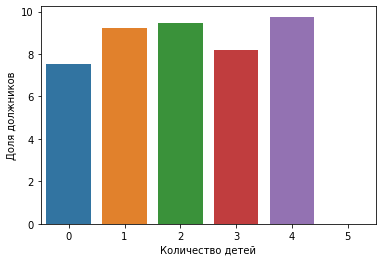

In [61]:
children_debt = data.pivot_table(index='children', columns='debt', values='purpose', aggfunc='count').reset_index()
children_debt['ratio'] = children_debt[1]/(children_debt[0]+children_debt[1])*100
children_debt.columns = ['Количество детей', 'Не имеют долга', 'Имеют долг', 'Доля должников']
print(children_debt) #строим сводную таблицу добавляя долю должников
seaborn.barplot(x=children_debt['Количество детей'], y=children_debt['Доля должников']) #визуализируем данные

**Вывод:** 
* Из диаграммы отчетливо видно, что все люди, имеющие 5 детей, не имеют долга по кредиту. Но это так же самая малочисленная группа кредитозаемщиков.
* Активнее всего берут кредит люди не имеющие детей, так же это группа с наименьшей долей должников.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

      Семейное положение  Не имеют долга  Имеют долг  Доля должников
0  Не женат / не замужем            2523         273        9.763948
1              в разводе            1105          84        7.064760
2         вдовец / вдова             888          63        6.624606
3       гражданский брак            3749         385        9.313014
4        женат / замужем           11334         927        7.560558


<AxesSubplot:xlabel='Доля должников', ylabel='Семейное положение'>

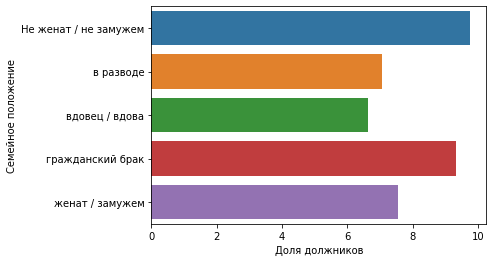

In [64]:
family_status_debt = data.pivot_table(index='family_status', columns='debt', values='purpose', aggfunc='count').reset_index()
family_status_debt['ratio'] = family_status_debt[1]/(family_status_debt[0]+family_status_debt[1])*100
family_status_debt.columns = ['Семейное положение', 'Не имеют долга', 'Имеют долг', 'Доля должников']
print(family_status_debt) #строим сводную таблицу добавляя долю должников
seaborn.barplot(y=family_status_debt['Семейное положение'], x=family_status_debt['Доля должников']) #визуализируем данные

**Вывод:** 
* Оценивая полученные данные, можем обратить внимане, что самая маленькая доля должников, среди кредитозаемщиков, это вдовцы/вдовы.
* Самая высокая доля должников наблюдается среди неженатых/незамужних кредитозаемщиков.
* На втором месте по доле должников - кредитозаемщики дивущие в гражданском браке.
* Практически равные доли должников у кредитозаемщиков с семейным положением женат/замужем и находящихся в разводе

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

  Уровень дохода  Не имеют долга  Имеют долг  Доля должников
0              A              23           2        8.000000
1              B            4660         354        7.060231
2              C           14568        1353        8.498210
3              D             328          21        6.017192
4              E              20           2        9.090909


<AxesSubplot:xlabel='Уровень дохода', ylabel='Доля должников'>

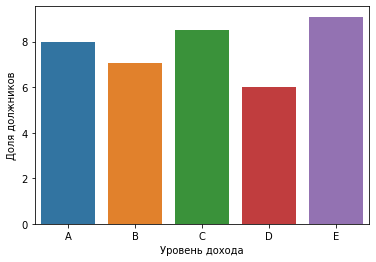

In [67]:
total_income_debt = data.pivot_table(index='total_income_category', columns='debt', values='purpose', aggfunc='count').reset_index()
total_income_debt['ratio'] = total_income_debt[1]/(total_income_debt[0]+total_income_debt[1])*100
total_income_debt.columns = ['Уровень дохода', 'Не имеют долга', 'Имеют долг', 'Доля должников']
print(total_income_debt) #строим сводную таблицу добавляя долю должников
seaborn.barplot(x=total_income_debt['Уровень дохода'], y=total_income_debt['Доля должников']) #визуализируем данные

**Вывод:** 
* Если сравнвать доли должников среди людей с разным уровнем дохода, то можно прдти к выводу, что самой рискованной группой являются люди зарабатывающие до 30000 рублей. 
* А самой платежеспособной группой являются люди с доходом от 30 до 50 тысяч рублей.
* Также хочу отметить,что репрезентативность данных о людях с доходом до 30 тыс. и людей с доходом больше 1 млн. можно поставить под сомнение. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

               Цель кредита  Не имеют долга  Имеют долг  Доля должников
0    операции с автомобилем            3879         400        9.347978
1  операции с недвижимостью            9971         780        7.255139
2     получение образования            3619         369        9.252758
3        проведение свадьбы            2130         183        7.911803


<AxesSubplot:xlabel='Доля должников', ylabel='Цель кредита'>

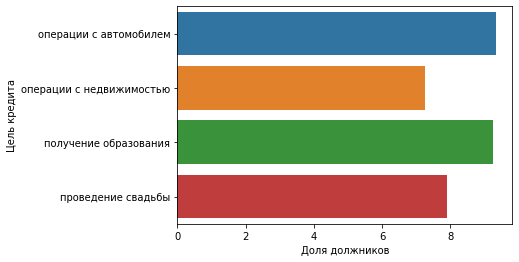

In [68]:
purpose_category_debt = data.pivot_table(index='purpose_category', columns='debt', values='purpose', aggfunc='count').reset_index()
purpose_category_debt['ratio'] = purpose_category_debt[1]/(purpose_category_debt[0]+purpose_category_debt[1])*100
purpose_category_debt.columns = ['Цель кредита', 'Не имеют долга', 'Имеют долг', 'Доля должников']
print(purpose_category_debt) #строим сводную таблицу добавляя долю должников
seaborn.barplot(y=purpose_category_debt['Цель кредита'], x=purpose_category_debt['Доля должников']) #визуализируем данные

**Вывод:** 
* Наибольшее количество должников среди людей берущих кредит на операции с автомобилем и получение образования
* Наименьшая доля должников наблюдается среди людей берущих кредит на операции с недвижимостью и на проведение свадьбы

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Пропуски в исходных данных были в колонках о доходе и общем трудовом стаже. Поэтому предположу, что причины могли быть следующие:
* Безработные, у которых нет дохода и/или трудового стажа
* Пенсионеры, у которых нет трудового стажа и, как следствие, дохода


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Среднее значение может быть не совсем объективным отражением данных, так как на него могут влиять выбросы (очень большие или очень маленькие значения в наборе данных). Медиана же, лишена такого недостатка и показывает середину наших данных, исключая аномалии.

### Шаг 4: общий вывод.

Исходя из имеющихся данных, прихожу к следующим выводам: 
* на возврат кредита в срок влияет, в большей степени, цель кредита и семейное положение кредитозаемщика
* самый большой процент должников среди людей зарабатывающих до 30 тысяч рублей, незамужних/не женатых, имеющиех 4 ребенка
* самые ответственные, к своим кредитнвм обязательствам, это люди зарабатывающие от 30 до 50 тысяч рублей, в семейном положении - вдовец/вдова, берущие кредит на недвижимость
